# $K$-Means. Machine learning algorithm

## Invención

El algoritmo $K$-means (algoritmo de Lloyd o algoritmo de Lloyd-Forgy) fue desarrollado de forma independiente por varios investigadores. El origen más antiguo conocido se remonta a Stuart Lloyd, quien lo describió por primera vez en 1957 como parte de su trabajo en [Bell Labs](https://www.bell-labs.com/#gref), aunque su artículo no tuvo una amplia difusión hasta que se publicó en 1982 con el título de ["Least squares quantization in PCM"](https://ieeexplore.ieee.org/document/1056489).

Otro desarrollo independiente fue el de E.W. Forgy en 1965, quien también publicó una versión del algoritmo de agrupamiento $K$-means.

El nombre "$K$-means" proviene del funcionamiento del algoritmo, pues este divide un conjunto de datos en $K$ grupos, donde cada grupo está representado por la media de los puntos de ese grupo.


## Intuición

$K$-means es un algoritmo de aprendizaje **no supervisado** popularmente utilizado para asignar etiquetas según las características de nuestros datos.

Por ejemplo, la agrupación se puede utilizar cuando hay un grupo grande de usuarios y existe la necesidad de dividirlos en subgrupos en función de sus atributos identificables. En otras palabras, tratamos de encontrar subgrupos homogéneos dentro de los datos de modo que dichos datos en cada grupo sean lo más **similares** posible. 


<img src="images/k-means/k-means_step_by_step.png" alt="Visualización de K-means" width="650">

## Conceptos clave:

### 1. Clúster
Un grupo de elementos o datos que comparten características similares entre sí.

#### Algunas funcionalidades de los clústers
* Descubrimiento de patrones: Los clústers revelan patrones ocultos en los datos que podrían no ser evidentes a simple vista.
* Segmentación de mercado: En marketing, los clusters se utilizan para segmentar a los clientes y personalizar las estrategias de marketing.
* Reducción de dimensionalidad: Los clusters pueden ayudar a reducir la complejidad de los datos al representar grupos de datos con un solo centroide.
* Anomalía detección: Los puntos que no encajan bien en ningún cluster pueden ser considerados como anomalías o outliers.

### 2. Centroide
Son puntos específicos seleccionados como el "centro" de un clúster, calculado como la media de todos los puntos del clúster. Su selección inicial se puede llevar a cabo a tavrés de distintod métodos.

<img src="images/k-means/centroides.png" alt="Métodos de inicialización de centroides" width="900">

### 3. Distancia o métrica
Explicar cómo K-Means mide la similitud calculando distancias, generalmente utilizando la **distancia euclidiana**.
$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$
Donde $x = (x_1, x_2, \cdots, x_n)$ y $y = (y_1, y_2, \cdots, y_n)$

<img src="images/k-means/euclidian_metric.png" alt="Distancia euclidiana" width="300">

#### Otras posibles opciones de distancias
* **Distancia de Manhattan**:
    También conocida como *distancia L1* (o *distancia del taxista* para los compas), mide la distancia entre dos puntos siguiendo los lados de un rectángulo.
$$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

    <img src="images/k-means/manhattan_distance.png" alt="Distancia de Manhattan" width="300">

* **Distancia de Minkowski**:
    Generalización de las distancias euclidiana y de Manhattan. Se utiliza para medir la similitud entre dos objetos.
$$d(x, y) = (\sum_{i=1}^{n} |x_i - y_i|^p)^{1/p}$$
    Donde $p$ es un número real positivo. Para $p=2$ se obtiene la distancia euclidiana, y para $p=1$ la distancia de Manhattan.

    Se utiliza ampliamente en la Inteligencia Artificial, especialmente en el campo de la minería de datos.

* **Distancia de Mahalanobis**:
    Considera la correlación entre las variables y escala las distancias de acuerdo con la covarianza de los datos.
    Es especialmente útil cuando las variables de nuestros datos están altamente correlacionadas y tienen diferentes escalas.
$$d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)}$$
    Donde $S$ es la matriz de covarianza de los datos.

    Puede ser muy útil en el análisis de datos genómicos, donde las variables están altamente correlacionadas debido a la estructura del genoma. En análisis de imágenes, para segmentar imágenes basadas en la textura y la forma. O en análisis de datos climáticos, para identificar patrones climáticos y agrupar estaciones meteorológicas.

#### ¿Cuándo utilizar qué distancia?

* Distancia euclidiana: Adecuada para la mayoría de los casos, especialmente cuando las variables están en la misma escala.
* Distancia de Manhattan: Útil cuando se quiere dar el mismo peso a todas las dimensiones.
* Distancia de Minkowski: Ofrece flexibilidad para ajustar la métrica a diferentes tipos de datos.
* Distancia de Mahalanobis: Aplicable cuando las variables están correlacionadas y se desea considerar la estructura de covarianza de los datos.


### 4. Número de clústeres (k)
Este es definido por el usuario con anticipación en base a diversas consideraciones y métodos.

#### Métodos
* Método del Codo (Elbow Method):
    * Se calcula la suma de las distancias cuadradas de cada punto a su centroide (inercia) para diferentes valores de k.
$$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$
    Donde: \
    $J$ es la inercia total \
    $K$ es el número de clústers\
    $C_i$ es el conjunto de puntos en el cluster $i$\
    $\mu_i$ es el centroide del clúster $i$\
    $∣∣⋅∣∣$ es la norma euclidiana 
    * Se grafica la inercia en función de k.
    * El punto de codo, donde la curva se aplana, sugiere el número óptimo de clusters.

    
    <img src="images/k-means/elbow_method.png" alt="Método del codo" width="600">

* Método de la Silueta:
    * Mide qué tan bien asignado está un punto a su cluster por medio de calcular el coeficiente de silueta $s(i)$ para cada punto $(i)$.
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$
    Donde $a(i)$ es la distancia promedio entre el punto $i$ y todos los demás puntos del mismo cluster. $b(i)$ es la distancia promedio entre el punto $i$ y todos los puntos del cluster más cercano (diferente al que pertenece $i$).
    * El valor de k que maximiza la silueta promedio es una buena elección.
    El coeficiente de silueta varía entre $-1$ y $1$, por lo que si:
        * $s(i) ≈ 1$: El punto está bien asignado a su cluster.
        * $s(i) ≈ 0$: El punto está en el límite entre dos clusters.
        * $s(i) ≈ -1$: El punto está mal asignado a su cluster.    

#### Consideraciones Adicionales
* Conocimiento del tema: A veces, la información del propio tópico puede sugerir un número de clústers razonable.
* Interpretabilidad: El número de clusters debe ser lo suficientemente pequeño para que los resultados sean interpretables.
* Estabilidad: La solución debe ser relativamente estable ante pequeñas variaciones en los datos.


# Pasos del algoritmo

## 1. Inicialización:
1.1 Se define la cantidad de clústeres, digamos $K$.

1.2 Se inicializan los $K$ centroides, uno por cada clúster.

## 2. Asignación:
Se asigna cada punto de datos al centroide más cercano en función de la distancia que sea más conveniente.

## 3. Actualización:
Se vuelven a asignar los centroides como la media de todos los puntos asignados a ese clúster.
$$\mu = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$$

El resultado inicial de ejecutar este algoritmo puede no ser el mejor resultado posible y volver a ejecutarlo con diferentes centroides iniciales aleatorios puede proporcionar un mejor rendimiento.

## 4. Repetición:
Se repiten los pasos 2 y 3 hasta que no haya cambios en las asignaciones de clústeres o se alcance un número máximo de iteraciones.

# Ejercicio con un ejemplo de juguete para hacer a mano

Graficar los datos y en base a los centroides dados, asignarlos a sus respectivos clústeres con la medida euclidiana.
* $K=2$ clústeres
* Centroides: $[2.5, 3.5], [7, 7.5]$
* Datos: $[2, 3], [3, 3], [4, 5], [6, 7], [6, 8], [7, 7]$

In [95]:
### SOLUCIÓN
# Importamos paqueterías
import numpy as np
#import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

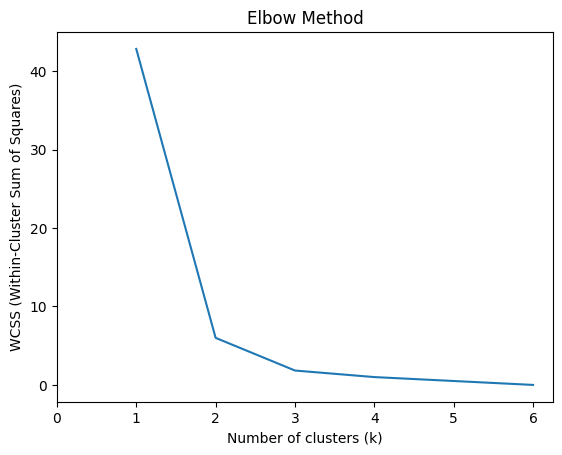

In [108]:
# Sample data
data0 = np.array([[2, 3], [3, 3], [4, 5], [6, 7], [6, 8], [7, 7]])

# Determine the optimal number of clusters (k) using elbow method
wcss0 = []
for k in range(1, data0.shape[0]+1): # En este pequeño ejemplo, para fines ilustrativos, nos conviene considerar tantos clústeres como datos
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42) # Se define el modelo
    kmeans.fit(data0) # Se aplica el modelo a los datos
    wcss0.append(kmeans.inertia_) # Se almacenan las respectivas inercias para cada k

plt.plot(range(1, data0.shape[0]+1), wcss0)
plt.xticks(np.arange(0, data0.shape[0]+1, 1)) 
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

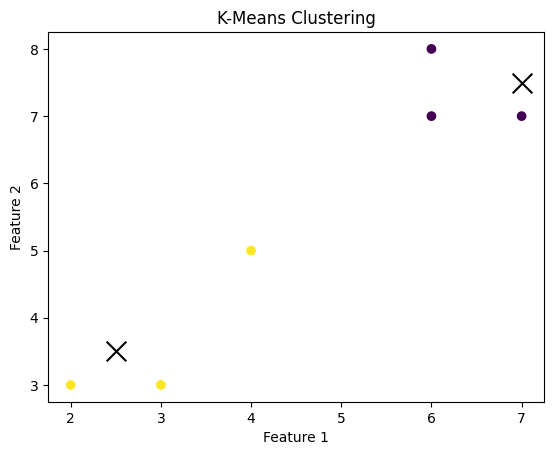

In [109]:
# Based on the elbow plot, choose the optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++') #, random_state=42
kmeans.fit(data0)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = np.array([[2.5,3.5], [7,7.5]])

# Visualize the clusters
plt.scatter(data0[:, 0], data0[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

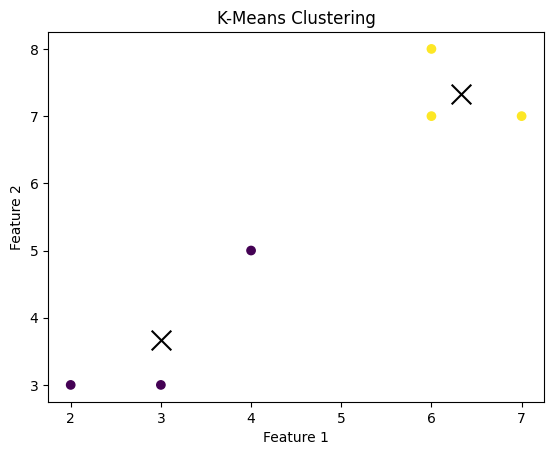

In [110]:
######## Con mejores centroides

# Based on the elbow plot, choose the optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42) #, random_state=42
kmeans.fit(data0)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(data0[:, 0], data0[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Un ejemplo más interesante con 300 puntos

In [5]:
# Importamos paqueterías
import numpy as np
#import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [112]:
# Set the random seed
np.random.seed(42) ## Ya funciona c:
# Generate 300 random points within the square [0, 1]x[0, 1]
points = np.random.rand(300, 2)
df = pd.DataFrame(points)
df.head()

,0,1
0,0.374540,0.950714
1,0.731994,0.598658
2,0.156019,0.155995
3,0.058084,0.866176
4,0.601115,0.708073


## Visualizamos nuestros datos

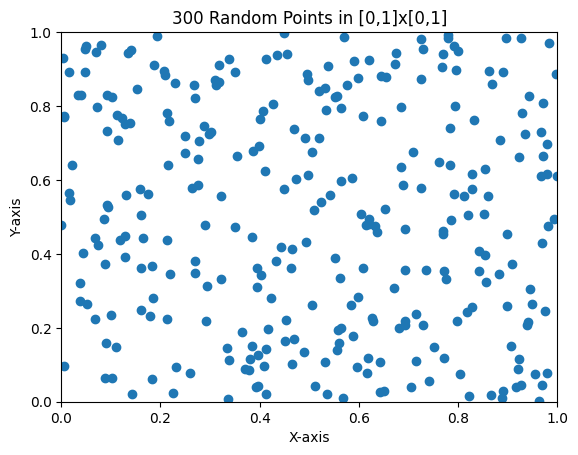

In [103]:
# Extract x and y coordinates
x = points[:, 0]
y = points[:, 1]

# Create a plot
plt.scatter(x, y)

# Set plot limits to [0, 1] for both axes
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("300 Random Points in [0,1]x[0,1]")

# Show the plot
plt.show()

## Aplicamos el método del codo para determinar el número más apropiado de clusters

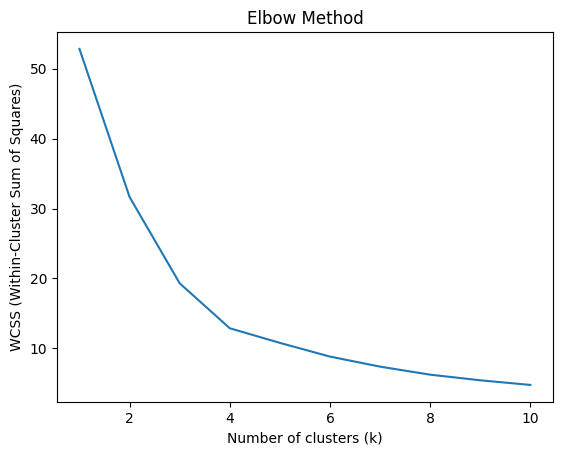

In [104]:
# Determine the optimal number of clusters (k) using elbow method
wcss = [] # within cluster sum of squares 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42) # Aplicamos el modelo
    kmeans.fit(points) # Normaliza los datos
    wcss.append(kmeans.inertia_) # Almacena los valores de inercia para cada k

# Graficamos los valores de inercia
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

## Corremos el algoritmo de $K$-Means con el número de clústers establecido anteriormente

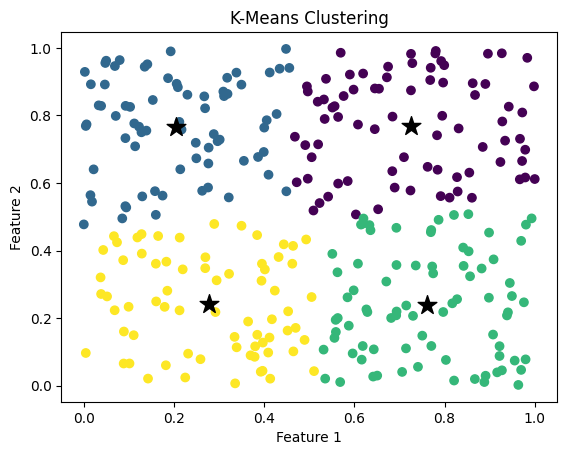

In [105]:
# Based on the elbow plot, choose the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42) #, random_state=42
kmeans.fit(points)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='black')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Ventajas
* Simplicidad: Es fácil de entender e implementar, tanto conceptualmente como desde el punto de vista computacional.
* Eficiencia: Relativamente rápido, especialmente para conjuntos de datos de tamaño moderado.
* Resultados interpretables: Los clusters resultantes son relativamente fáciles de interpretar.
* Ampliamente utilizado: Es un algoritmo estándar en el campo del aprendizaje no supervisado, lo que significa que existe una gran cantidad de recursos y herramientas disponibles para su uso.

## Desventajas
* Dependencia de la inicialización: La elección inicial de los centroides puede afectar significativamente los resultados finales.
* Necesidad de especificar $K$: Se requiere conocer de antemano el número óptimo de clusters (k), lo cual no siempre es evidente.
* Sensibilidad a outliers: Los outliers pueden influir significativamente en la posición de los centroides y, por lo tanto, en la calidad de los clusters.
* Asunción de clusters esféricos: K-means asume que los clusters tienen forma esférica y densidad uniforme, lo que puede no ser el caso en muchos conjuntos de datos reales.
* Sensibilidad a la escala: Los resultados pueden variar significativamente si las variables tienen escalas muy diferentes.


Se ha utilizado en una amplia gama de áreas de aplicación en muchos campos diferentes tales como segmentación de mercado, compresión de imágenes y reconocimiento de patrones. Algunos pocos artículos interesantes:

* [Agrupación de tomografías de riñones](https://ijs.uobaghdad.edu.iq/index.php/eijs/article/view/6629/3568)
* [K-Means Clustering In Spatial Data Mining Using Weka Interface](https://www.ijcaonline.org/proceedings/icacact/number1/7970-1006/)
* [Application of K-Means Algorithm in Marketing](https://www.ewadirect.com/proceedings/aemps/article/view/9734)


## Referencias

* Artificial, I., & Artificial, I. (2023, 20 diciembre). Distancia de Minkowski. Inteligencia Artificial 360. https://inteligenciaartificial360.com/glosario/distancia-de-minkowski/#:~:text=La%20Distancia%20de%20Minkowski%20es,atributos%20de%20los%20dos%20objetos.
* 

/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/opt/conda/envs/umap/lib/python3.9/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


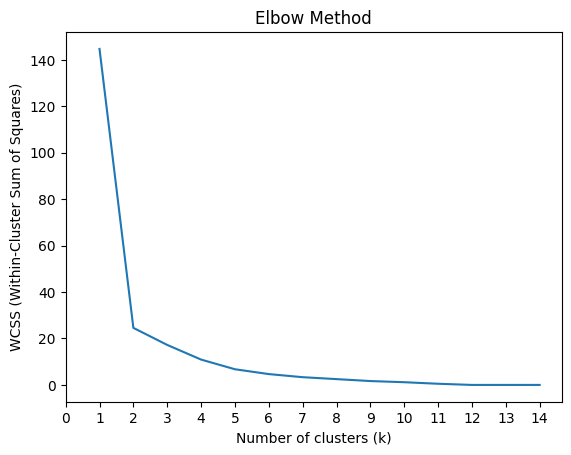

In [70]:
# Sample data (replace with your own data)
data = np.array([[2, 3], [4, 5], [6, 7], [8, 9], [1, 2], [3, 4], [5, 6], [7, 8], [2, 3], [3, 3], [6, 8], [8, 8], [3, 4], [7, 7]])

## Ejercicio agregar [1, 8], [1, 9], [2, 8], [2, 9], [3, 8], [3, 9]

# Determine the optimal number of clusters (k) using elbow method
wcss = []
for k in range(1, data.shape[0]+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, data.shape[0]+1), wcss)
plt.xticks(np.arange(0, data.shape[0]+1, 1)) 
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

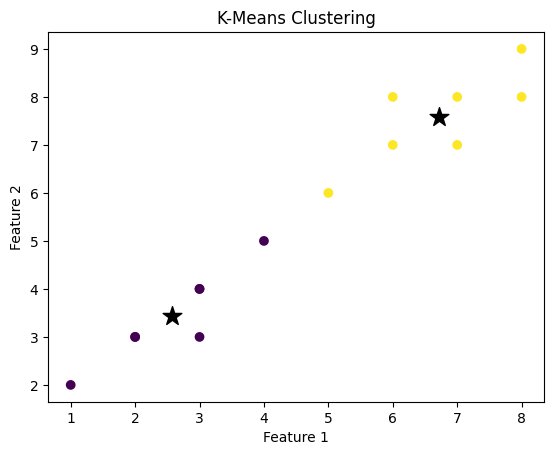

In [38]:
# Based on the elbow plot, choose the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, init='k-means++') #, random_state=42
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Ejemplo de juguete utilizando la métrica de Manhattan

In [107]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock # Distancia de Manhattan

# Crear un DataFrame de muestra
data = {'Casual': [3, 1, 4, 2, 5], 
        'Formal': [2, 5, 1, 3, 4],
        'Deportivo': [4, 3, 2, 5, 1]}
df = pd.DataFrame(data)

# Aplicar K-means con distancia de Manhattan
kmeans = KMeans(n_clusters=2, metric='cityblock')
kmeans.fit(df)

# Obtener los labels de los clusters
labels = kmeans.labels_
print(labels)

TypeError: __init__() got an unexpected keyword argument 'metric'

## Ejemplo usando únicamente numpy

In [83]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        """
        Initialize the KMeans object.
        
        Parameters:
        - n_clusters: int, number of clusters (k) to find.
        - max_iter: int, maximum number of iterations to run the algorithm.
        - tol: float, tolerance for convergence. If the centroids move by less than tol, the algorithm stops.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
    
    def fit(self, X):
        """
        Fit the KMeans algorithm to the data.

        Parameters:
        - X: numpy array of shape (n_samples, n_features), the input data.
        """
        # Randomly initialize centroids by picking `n_clusters` random points from X
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for i in range(self.max_iter):
            # Step 1: Assign each data point to the nearest centroid
            labels = self._assign_clusters(X)
            
            # Step 2: Update centroids to the mean of the assigned points
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            
            # Check for convergence (if the centroids don't move much)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            
            # Update centroids for the next iteration
            self.centroids = new_centroids
    
    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.

        Parameters:
        - X: numpy array of shape (n_samples, n_features), the input data.

        Returns:
        - labels: numpy array of shape (n_samples,), the predicted cluster for each sample.
        """
        return self._assign_clusters(X)
    
    def _assign_clusters(self, X):
        """
        Assign each data point to the nearest centroid.

        Parameters:
        - X: numpy array of shape (n_samples, n_features), the input data.

        Returns:
        - labels: numpy array of shape (n_samples,), the cluster assignment for each sample.
        """
        # Compute the distance between each point in X and each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        
        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=1)
        return labels


In [84]:
# Generate some random data
X = np.random.rand(100, 2)  # 100 points in 2D space

# Create a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the data
kmeans.fit(X)

# Predict the cluster for new points
labels = kmeans.predict(X)

# Centroids after training
print("Centroids:", kmeans.centroids)


Centroids: [[0.70807597 0.75973306]
 [0.18104095 0.49256039]
 [0.69241068 0.25213293]]
